<a href="https://colab.research.google.com/github/Zoro114/mne/blob/main/frequency_vs_time_for_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 5.2 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mne

In [ ]:
data_path=mne.datasets.sample.data_path()
meg_fname=data_path/'MEG'/'sample'
raw_fname=meg_fname/'sample_audvis_filt-0-40_raw.fif'
event_fname=meg_fname/'sample_audvis_filt-0-40_raw-eve.fif'

raw=mne.io.read_raw_fif(raw_fname,preload=True)
events=mne.read_events(event_fname)

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 480GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


In [ ]:
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2,
            'Visual/Left': 3, 'Visual/Right': 4}

In [ ]:
reject = dict(mag=3000e-15,grad=3000e-13,eeg=100e-6,eog=200e-6)

In [ ]:
raw.filter(10,12)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 199 samples (1.325 sec)



<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MB, data loaded>

In [ ]:
epochs=mne.Epochs(raw,events,event_id,tmin=-0.5,tmax=1.5,baseline=None,proj=True,reject=reject,preload=True,verbose='error')
del raw

In [ ]:
df = epochs.to_data_frame(time_format=None,scalings=dict(eeg=1, mag=1, grad=1))
df.head()

,time,condition,epoch,MEG 0113,MEG 0112,MEG 0111,MEG 0122,MEG 0123,MEG 0121,MEG 0132,...,EEG 052,EEG 053,EEG 054,EEG 055,EEG 056,EEG 057,EEG 058,EEG 059,EEG 060,EOG 061
0,-0.499488,Visual/Left,1,4.610698e-12,1.490138e-12,8.786036e-15,4.872627e-13,3.811255e-14,-1.050202e-13,8.417231e-13,...,-0.000001,-2.738145e-07,1.411756e-06,1.177853e-06,2.033776e-07,1.689465e-06,1.901676e-06,1.543722e-06,5.667438e-07,-71.982720
1,-0.492828,Visual/Left,1,3.167765e-12,1.469077e-12,-2.062531e-14,-6.489358e-13,1.097027e-12,-1.075587e-13,-5.621832e-13,...,-0.000003,-2.280304e-07,2.616206e-07,-6.369013e-07,-1.592302e-06,4.585942e-07,4.239294e-07,-2.210197e-07,-6.505732e-07,-63.912281
2,-0.486168,Visual/Left,1,9.218060e-13,1.137313e-12,-5.249979e-14,-1.668619e-12,1.884995e-12,-9.028214e-14,-1.910436e-12,...,-0.000003,-1.509298e-07,-9.470013e-07,-2.338243e-06,-3.063998e-06,-8.890423e-07,-1.155060e-06,-1.960340e-06,-1.758163e-06,-54.352427
3,-0.479509,Visual/Left,1,-1.649358e-12,5.722488e-13,-8.227664e-14,-2.356499e-12,2.254338e-12,-5.920207e-14,-2.906130e-12,...,-0.000004,-5.465201e-08,-1.979034e-06,-3.611760e-06,-3.949454e-06,-2.101789e-06,-2.551734e-06,-3.354865e-06,-2.594119e-06,-46.923936
4,-0.472849,Visual/Left,1,-3.969608e-12,-1.013922e-13,-1.037398e-13,-2.564293e-12,2.151141e-12,-2.202070e-14,-3.318857e-12,...,-0.000003,4.704873e-08,-2.633380e-06,-4.225623e-06,-4.105385e-06,-2.947032e-06,-3.511828e-06,-4.149343e-06,-3.037180e-06,-43.465338


In [ ]:
long_df = epochs.to_data_frame(time_format=None, index='condition',
                               long_format=True)
long_df.head()

Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


,epoch,time,channel,ch_type,value
condition,,,,,
Visual/Left,1,-0.499488,MEG 0113,grad,46.106980
Visual/Left,1,-0.499488,MEG 0112,grad,14.901382
Visual/Left,1,-0.499488,MEG 0111,mag,8.786036
Visual/Left,1,-0.499488,MEG 0122,grad,4.872627
Visual/Left,1,-0.499488,MEG 0123,grad,0.381126


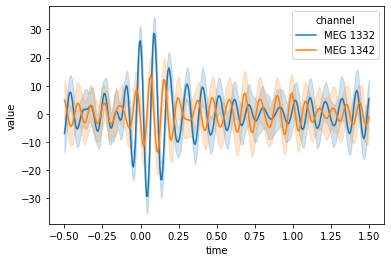

In [ ]:
plt.figure()
channels = ['MEG 1332', 'MEG 1342']
data = long_df.loc['Auditory/Left'].query('channel in @channels')
data['channel'] = data['channel'].astype(str)
data.reset_index(drop=True, inplace=True) 
sns.lineplot(x='time', y='value', hue='channel', data=data)